# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
sns.set_palette('viridis')

%matplotlib inline

act_df = pd.read_csv('../data/act.csv', index_col=0)
sat_df = pd.read_csv('../data/sat.csv', index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [2]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

**State**: The state that describes the row.

**Participation**: The percentage of eligible high school students that took the exam.

**ACT data only:**  

English/Math/Reading/Science: the mean score for the exam section

Composite - the mean of the 4 section scores by state

**SAT data only:**

Evidence-Based Reading and Writing/Math: mean score for each exam section by state  

Total - sum of the scores of the Reading and Writing/Math sections

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [4]:
act_df.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [5]:
sat_df.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [6]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [7]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
act_df.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9
Composite,52.0,21.509615,2.002083,17.8,19.800,21.40,23.600,25.5


In [9]:
sat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


Participation has an object dtype (because of the % sign). We should convert the participation column to numeric.

There is a data entry error for Maryland; from the source website the ACT Science score should be 23.2 and the SAT Math score should be 524.

##### 5. Print the types of each column.

In [10]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [11]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

***Converting participation variables to numeric***

In [12]:
act_df['Participation'] = act_df['Participation'].map(lambda x: int(x.replace('%', '')))

In [13]:
act_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [14]:
sat_df['Participation'] = sat_df['Participation'].map(lambda x: int(x.replace('%', '')))

In [15]:
sat_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [16]:
sat_state_dict = sat_df.set_index('State').to_dict()
sat_part_dict = sat_df.set_index('Participation').to_dict()
sat_ebrw_dict = sat_df.set_index('Evidence-Based Reading and Writing').to_dict()
sat_math_dict = sat_df.set_index('Math').to_dict()
sat_total_dict = sat_df.set_index('Total').to_dict()

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [17]:
act_dict = act_df.to_dict()

*<b>Renaming variables</b>*

In [18]:
sat_df = sat_df.rename(columns={'Participation' : 'sat_ptc', \
                                'Evidence-Based Reading and Writing': 'sat_reading', \
                                'Math': 'sat_math', 'Total': 'sat_total'})

act_df = act_df.rename(columns={'Participation' : 'act_ptc', \
                                'English' : 'act_eng', 'Math': 'act_math',\
                                'Reading': 'act_reading', 'Science': 'act_sci',\
                                'Composite': 'act_composite'})

##### 9. Merge the dataframes on the state column.

In [19]:
test_df = sat_df.merge(act_df, on='State')

In [20]:
test_df.head()

,State,sat_ptc,sat_reading,sat_math,sat_total,act_ptc,act_eng,act_math,act_reading,act_sci,act_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


In [21]:
test_df.dtypes

State             object
sat_ptc            int64
sat_reading        int64
sat_math           int64
sat_total          int64
act_ptc            int64
act_eng          float64
act_math         float64
act_reading      float64
act_sci          float64
act_composite    float64
dtype: object

*Correcting data entry errors for Maryland test scores*

In [22]:
test_df.iloc[20,3] = 524
test_df.iloc[20,9] = 23.2

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [23]:
test_df.agg(['min', 'max'])

,State,sat_ptc,sat_reading,sat_math,sat_total,act_ptc,act_eng,act_math,act_reading,act_sci,act_composite
min,Alabama,2,482,468,950,8,16.3,18.0,18.1,18.2,17.8
max,Wyoming,100,644,651,1295,100,25.5,25.3,26.0,24.9,25.5


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [24]:
sd = [np.std(test_df[column]) for column in test_df.columns[1:]]
sd

[34.92907076664508,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [25]:
sd.insert(0, 'Std')

In [26]:
test_df_with_std = test_df

In [27]:
test_df_with_std.loc[-1] = sd

<b> *Remove standard deviation observation* </b>

In [28]:
test_df.drop(-1, inplace=True)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [29]:
test_df.sort_values('sat_ptc', ascending=False)

,State,sat_ptc,sat_reading,sat_math,sat_total,act_ptc,act_eng,act_math,act_reading,act_sci,act_composite
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,76.0,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,71.0,539.0,524.0,1062.0,21.0,24.0,23.3,24.7,23.4,24.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [30]:
test_df[test_df['sat_ptc'] > 50]

,State,sat_ptc,sat_reading,sat_math,sat_total,act_ptc,act_eng,act_math,act_reading,act_sci,act_composite
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3
14,Indiana,63.0,542.0,532.0,1074.0,35.0,22.0,22.4,23.2,22.3,22.6
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

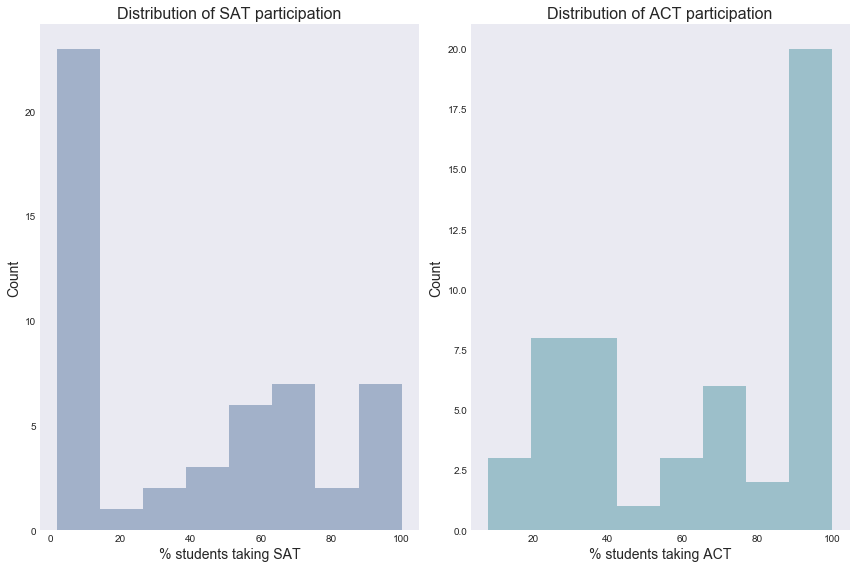

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.distplot(test_df['sat_ptc'], bins=8, ax=ax[0], kde=False, color='C1')
ax[0].set_title('Distribution of SAT participation', size=16)
ax[0].set_xlabel('% students taking SAT', size=14)
ax[0].set_ylabel('Count', size=14)

sns.distplot(test_df['act_ptc'], bins=8, ax=ax[1], kde=False, color='C2')
ax[1].set_title('Distribution of ACT participation', size=16)
ax[1].set_xlabel('% students taking ACT', size=14)
ax[1].set_ylabel('Count', size=14)

plt.tight_layout()

##### 17. Plot the Math(s) distributions from both data sets.

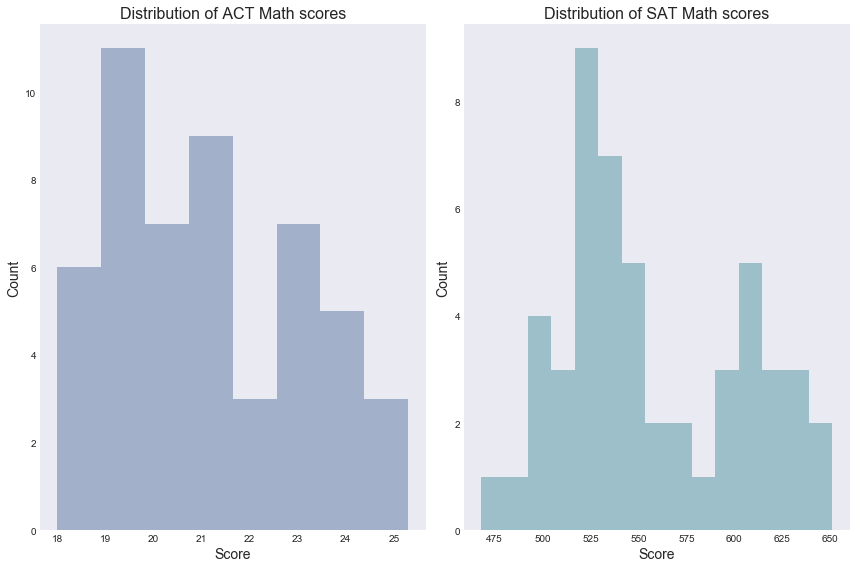

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.distplot(test_df['act_math'], bins=8, ax=ax[0], kde=False, color='C1')
ax[0].set_title('Distribution of ACT Math scores', size=16)
ax[0].set_xlabel('Score', size=14)
ax[0].set_ylabel('Count', size=14)

sns.distplot(test_df['sat_math'], bins=15, ax=ax[1], kde=False, color='C2')
ax[1].set_title('Distribution of SAT Math scores', size=16)
ax[1].set_xlabel('Score', size=14)
ax[1].set_ylabel('Count', size=14)

plt.tight_layout()

##### 18. Plot the Verbal distributions from both data sets.

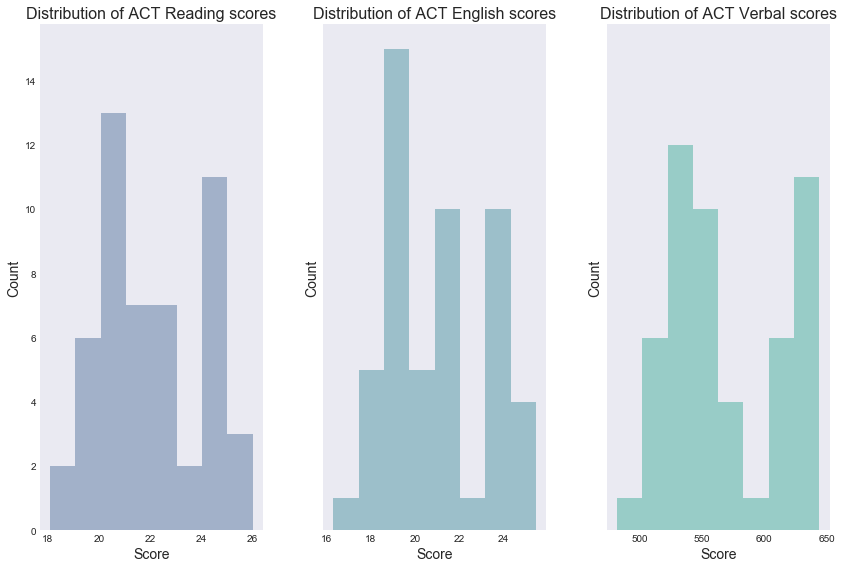

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12, 8), sharey=True)

sns.distplot(test_df['act_reading'], bins=8, ax=ax[0], kde=False, color='C1')
ax[0].set_title('Distribution of ACT Reading scores', size=16)
ax[0].set_xlabel('Score', size=14)
ax[0].set_ylabel('Count', size=14)

sns.distplot(test_df['act_eng'], bins=8, ax=ax[1], kde=False, color='C2')
ax[1].set_title('Distribution of ACT English scores', size=16)
ax[1].set_xlabel('Score', size=14)
ax[1].set_ylabel('Count', size=14)

sns.distplot(test_df['sat_reading'], bins=8, ax=ax[2], kde=False, color='C3')
ax[2].set_title('Distribution of ACT Verbal scores', size=16)
ax[2].set_xlabel('Score', size=14)
ax[2].set_ylabel('Count', size=14)

plt.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

We often assume the shape of the distribution; often we assume that the data follows a normal distribution.

##### 20. Does this assumption hold true for any of our columns? Which?

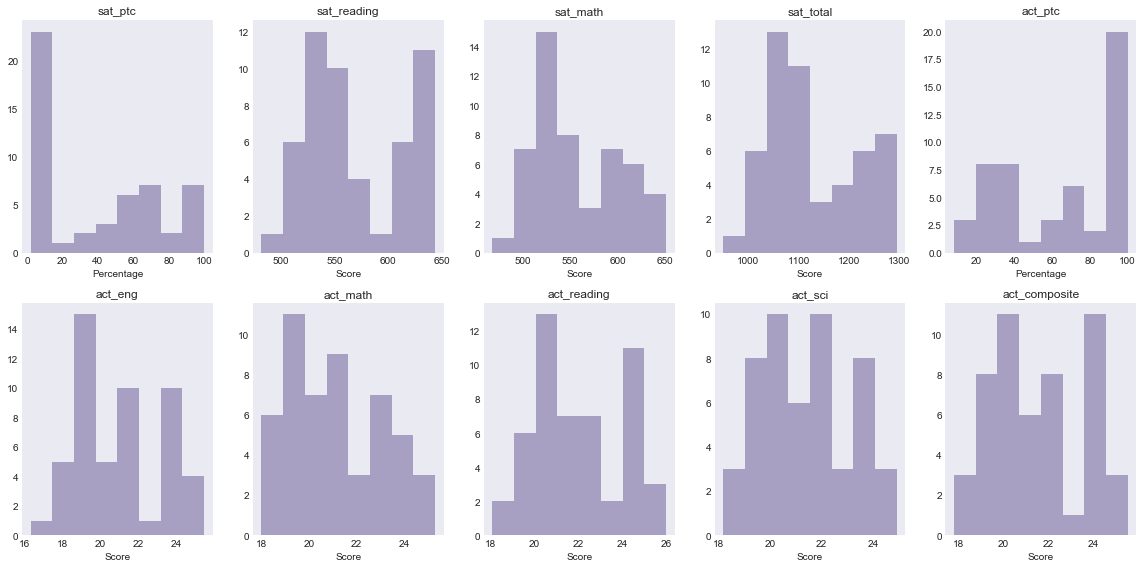

In [34]:
figure = plt.figure(figsize=(16,8))
for i, columns in enumerate(test_df.columns[1:]):
    figure.add_subplot(2,5,1+i)
    col_data = test_df[columns]
    plots = sns.distplot(col_data, bins = 8, kde=False)
    if 'ptc' in columns:
        plots.set_xlabel('Percentage')
    else:
        plots.set_xlabel('Score')
    plt.title(columns)
plt.tight_layout()

None of the variables for our test scores appear to be normally distributed.

##### 21. Plot some scatterplots examining relationships between all variables.

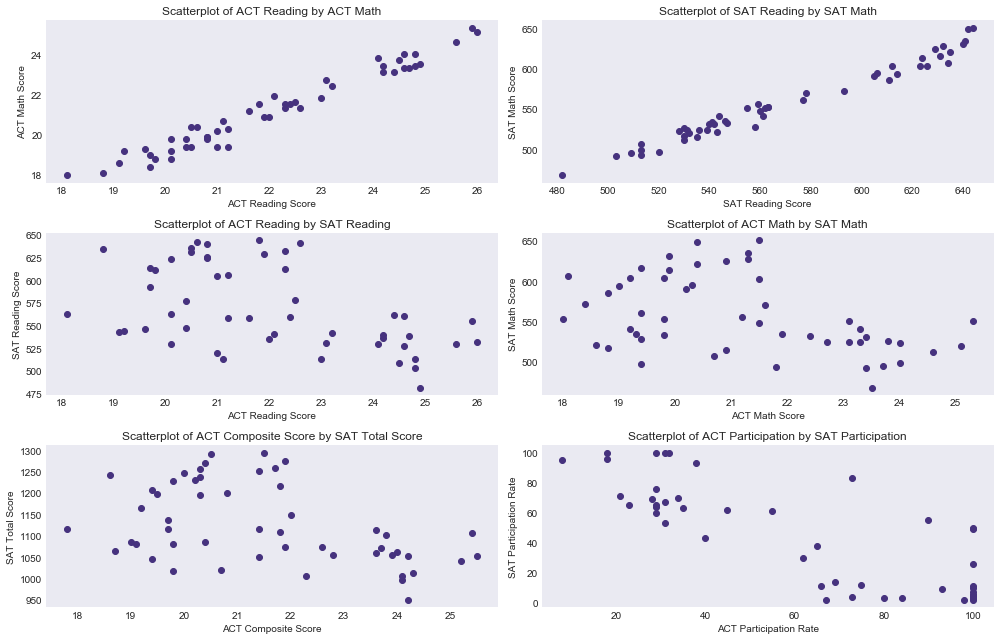

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(14, 9))

ax[0,0].scatter('act_reading', 'act_math', data=test_df)
ax[0,0].set_title('Scatterplot of ACT Reading by ACT Math')
ax[0,0].set_xlabel('ACT Reading Score')
ax[0,0].set_ylabel('ACT Math Score')

ax[0,1].scatter('sat_reading', 'sat_math', data=test_df)
ax[0,1].set_title('Scatterplot of SAT Reading by SAT Math')
ax[0,1].set_xlabel('SAT Reading Score')
ax[0,1].set_ylabel('SAT Math Score')

ax[1,0].scatter('act_reading', 'sat_reading', data=test_df)
ax[1,0].set_title('Scatterplot of ACT Reading by SAT Reading')
ax[1,0].set_xlabel('ACT Reading Score')
ax[1,0].set_ylabel('SAT Reading Score')

ax[1,1].scatter('act_math', 'sat_math', data=test_df)
ax[1,1].set_title('Scatterplot of ACT Math by SAT Math')
ax[1,1].set_xlabel('ACT Math Score')
ax[1,1].set_ylabel('SAT Math Score')

ax[2,0].scatter('act_composite', 'sat_total', data=test_df)
ax[2,0].set_title('Scatterplot of ACT Composite Score by SAT Total Score')
ax[2,0].set_xlabel('ACT Composite Score')
ax[2,0].set_ylabel('SAT Total Score')

ax[2,1].scatter('act_ptc', 'sat_ptc', data=test_df)
ax[2,1].set_title('Scatterplot of ACT Participation by SAT Participation')
ax[2,1].set_xlabel('ACT Participation Rate')
ax[2,1].set_ylabel('SAT Participation Rate')

plt.tight_layout()

*Plot a pairplot which generates scatterplot for ALL 2 variable combinations (a scatterplot of a variable against itself results in the histogram for that variable).*

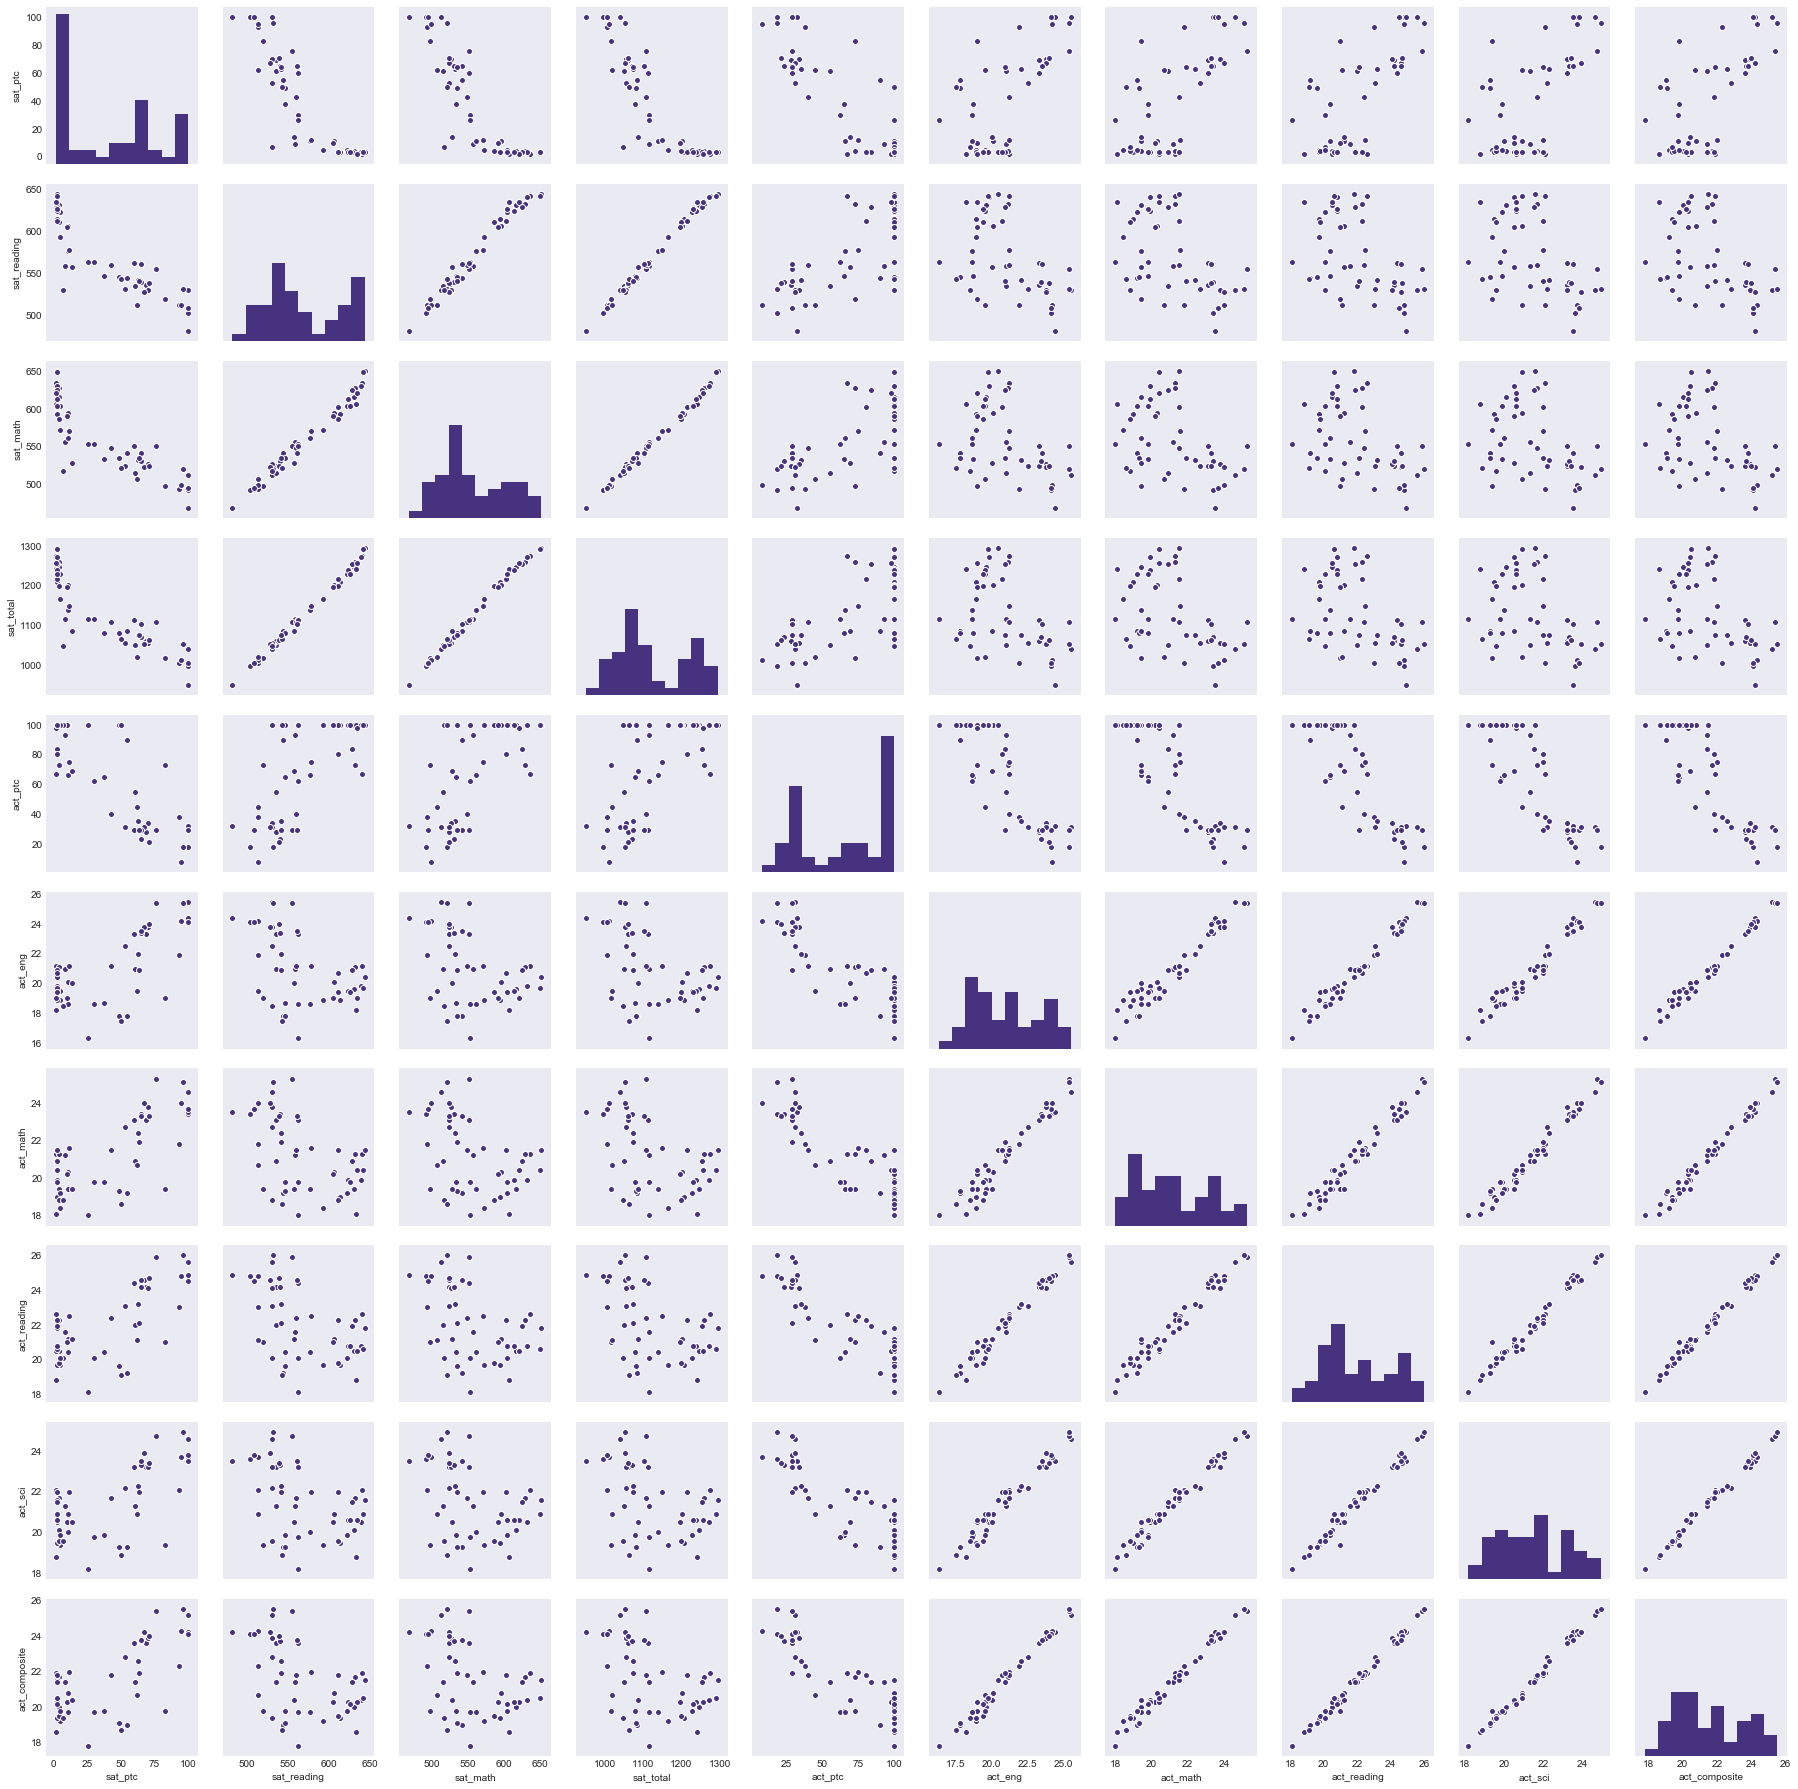

In [36]:
sns.pairplot(test_df);

##### 22. Are there any interesting relationships to note?

In general, scores on different sections in the same exam were positvely correlated (i.e. higher score on SAT English was associated with higher score on SAT Math as well as higher total) while scores across exams (i.e. comparing SAT Math vs ACT Math) had little to no relationship.

There was a negative correlation between participating in one exam vs the other (i.e. students in states with high SAT participation were less likely to take the ACT and vice versa).

Interestingly, SAT participation and ACT composite score had a slight positive correlation, as did ACT participation and SAT total score. 

##### 23. Create box plots for each variable. 

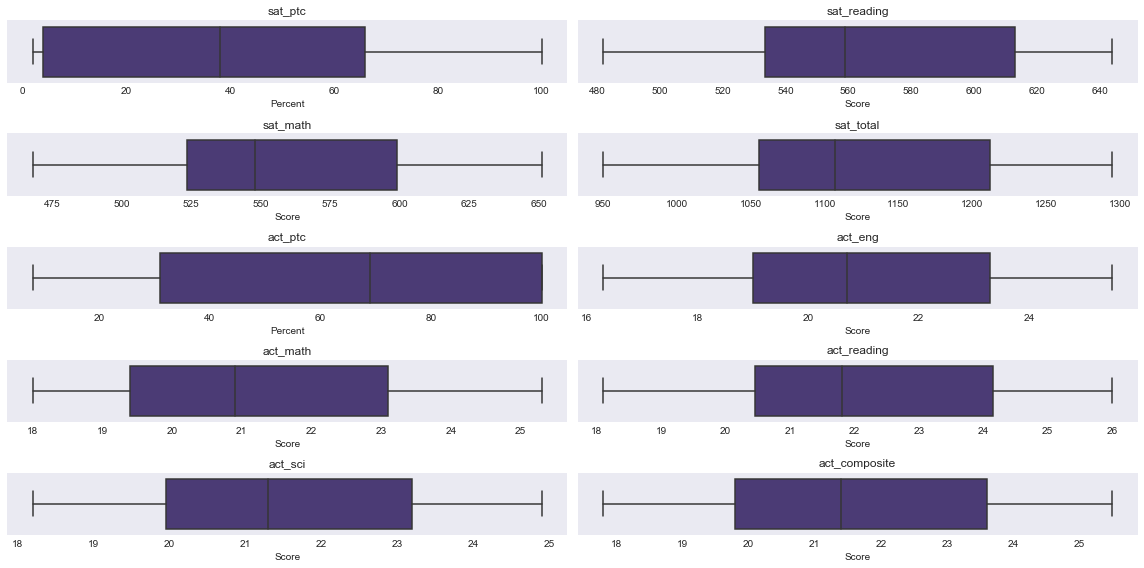

In [37]:
figure = plt.figure(figsize=(16,8))
for i, columns in enumerate(test_df.columns[1:]):
    figure.add_subplot(5,2,i+1)
    test = sns.boxplot(test_df[columns])
    if 'ptc' in columns:
        test.set_xlabel('Percent')
    else:
        test.set_xlabel('Score')
    plt.title(columns)
    
plt.tight_layout()

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [38]:
test_df.describe()

,sat_ptc,sat_reading,sat_math,sat_total,act_ptc,act_eng,act_math,act_reading,act_sci,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


<b> SAT variables </b>
* The distribution for SAT participation is skewed right. Mean participation was 40%, with a standard deviation of 35 percentage points.
* SAT reading scores had 2 large peaks between 525 and 550 and between 625 and 650. The mean score was 569 with a standard deviation of 45.7. 
* SAT math scores only had 1 large peak between 525 and 550 with slight right skew for the distribution. The mean SAT Math score was 557 with a standard deviation of 47.1.
* Total SAT score had a mean of 1126 with a SD of 92.5. The distribution for total score had two noticeable peaks between 1050 and 1100 and between 1250 and 1300.

<b> ACT variables </b>
* The distribution for ACT participation has 2 large peaks between 20 and 40% and between 85 and 100%. Mean participation in the ACT was 21% with a SD of 32 percentage points.
* The distribution for ACT section scores (English, Reading, Math, Science) were right skewed, all with plateuaus between scores of 23 and 25. Mean scores and standard deviations by score were as follows:
 * English: 20.93, 2.35
 * Math: 21.2, 1.98
 * Reading: 22.0, 2.07
 * Science: 21.45, 1.75
* ACT composite score had a mean 21.51 and SD 2.02. The distribution had peaks between 19 and 21 and between 23 and 25.  

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

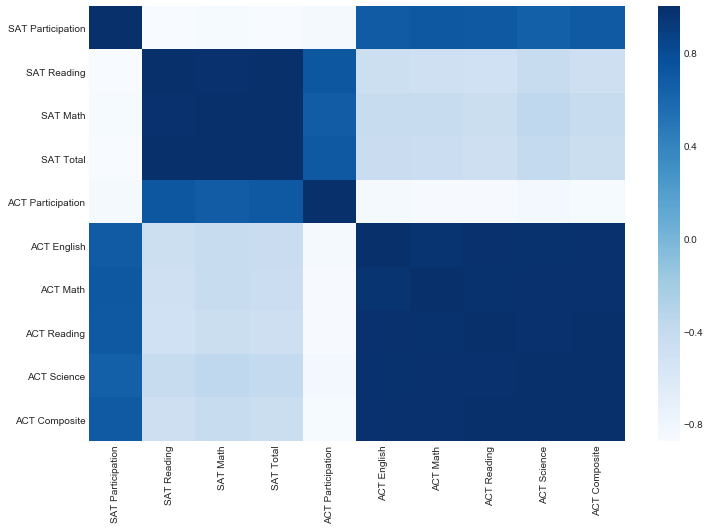

In [39]:
labels = ['SAT Participation', 'SAT Reading', 'SAT Math', 'SAT Total',
          'ACT Participation', 'ACT English', 'ACT Math', 'ACT Reading',
          'ACT Science', 'ACT Composite']

plt.figure(figsize=(12, 8))
sns.heatmap(test_df.corr(), 
            cmap='Blues', 
            fmt='.2f', 
            xticklabels=labels,
            yticklabels=labels,
           )

In [40]:
test_df[1:].corr()

,sat_ptc,sat_reading,sat_math,sat_total,act_ptc,act_eng,act_math,act_reading,act_sci,act_composite
sat_ptc,1.000000,-0.874950,-0.858088,-0.869303,-0.837783,0.681464,0.703610,0.698693,0.645507,0.687720
sat_reading,-0.874950,1.000000,0.987426,0.996754,0.715170,-0.456889,-0.482262,-0.484060,-0.416648,-0.465721
sat_math,-0.858088,0.987426,1.000000,0.996915,0.684415,-0.418654,-0.420235,-0.441216,-0.363364,-0.416370
sat_total,-0.869303,0.996754,0.996915,1.000000,0.701871,-0.438674,-0.452051,-0.463745,-0.390719,-0.441939
act_ptc,-0.837783,0.715170,0.684415,0.701871,1.000000,-0.840888,-0.857649,-0.863259,-0.832319,-0.854491
act_eng,0.681464,-0.456889,-0.418654,-0.438674,-0.840888,1.000000,0.970033,0.986404,0.980661,0.991522
act_math,0.703610,-0.482262,-0.420235,-0.452051,-0.857649,0.970033,1.000000,0.979820,0.987016,0.990834
act_reading,0.698693,-0.484060,-0.441216,-0.463745,-0.863259,0.986404,0.979820,1.000000,0.987741,0.994945
act_sci,0.645507,-0.416648,-0.363364,-0.390719,-0.832319,0.980661,0.987016,0.987741,1.000000,0.995001
act_composite,0.687720,-0.465721,-0.416370,-0.441939,-0.854491,0.991522,0.990834,0.994945,0.995001,1.000000


From the above correlation matrix, we can make the following summary:
 * SAT Math and Reading are strongly positively correlated (r = 0.99)
 * Individual SAT section scores and the total SAT score are logically very positively correlated. (r = 0.997 for both Math and Reading) This makes sense since the total score includes the individual section scores.
 * Same goes for the correlation among ACT section scores and between ACT section scores and the composite score:
    * English x Math: r = 0.97
    * English x Reading: r = 0.99 
    * English x Science: r = 0.98 
    * Math x Reading: r = 0.98
    * Math x Science: r = 0.99
    * Reading x Science: r = 0.99
    * English x Composite: r = 0.99 
    * Math x Composite: r = 0.99
    * Reading x Composite: r = 0.99
    * Science x Composite: r = 0.99
 * SAT participation and ACT participation are negatively correlated (r = -0.84)
 * SAT participation and individual ACT section scores were mildly positively correlated (and by extension SAT participation vs ACT composite score):
    * ACT English x SAT participation: r = 0.68 
    * Math x SAT: r = 0.70 
    * Reading x SAT: r = 0.70
    * Science x SAT: r = 0.65
    * Composite x SAT: r = 0.69
 * ACT participation and SAT section/total scores are similarly mildly positively correlated:
    * SAT Reading x ACT participation: r = 0.72
    * SAT Math x ACT: r = 0.68
    * SAT Total x ACT: r = 0.70

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

$H_o$: The rates of SAT and ACT participation rates are equal.  
$H_a$: The rates of SAT participation and ACT participation differ.

We can perform a two sample t-test.

In [41]:
import scipy.stats as stats

stats.ttest_ind(test_df['sat_ptc'], test_df['act_ptc'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

Since p < 0.05, we reject the null hypothesis that the rates of SAT and ACT participation rates were equal and conclude that the rates do differ.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [42]:
stats.norm.interval(0.95, loc=np.mean(test_df['sat_ptc']), scale=np.std(test_df['sat_ptc'])/np.sqrt(len(test_df['sat_ptc'])))

(30.217643220943465, 49.39019991631144)

We are 95% confident that the population mean for SAT participation is between 30.2% and 49.4%.

In [43]:
stats.norm.interval(0.95, loc=np.mean(test_df['act_ptc']), scale=np.std(test_df['act_ptc'])/np.sqrt(len(test_df['act_ptc'])))

(56.5207615945811, 73.98904232698752)

We are 95% confident that the population mean for ACT participation is between 56.5% and 74%.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, since our hypothesis test suggested that the mean participation rate differed between the two tests, it makes sense that 
the confidence intervals for the mean do not overlap.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Yes and no. Strictly speaking, the actual questions of the SAT and ACT math sections shouldn't be related. However, from area knowledge we can bring up some caveats:
* Students with stronger mathematical knowledge are likely to do better on both tests (and those with weaker knowledge would do worse).
* Students who take the SAT and do well are more likely to take the ACT (thus ALSO doing well on the ACT Math section).
* Many states required students to take one of the exams; students who took the non-required exam are more likely to excel.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

The datasets we have contain the participation rate for SAT and ACT in each state, as well as the mean scores by state for each test section. It doesn't make sense to infer conclusions about the population of *mean* data since we have it; we could make conclusions about this data since we have all data points for the population of states. If we wanted to make inferences about *individual* student test score data, I would not recommend doing so from the current dataset since student populations in each state widely vary based on demographics, geography, and socioeconomic factors which would affect the mean scores and participation rate.